`cd project/seniorthesis/notebooks`

`conda list PyCO2SYS`

`pip install PyCO2SYS`

`pip install git+https://github.com/jbusecke/cmip6_preprocessing.git`

`mv *.png ../figures`

In [1]:
import xarray as xr
import xesmf as xe
from cmip6_preprocessing.preprocessing import combined_preprocessing
# import PyCO2SYS as pyco2 # i have to install this package through terminal for it to work
import intake
import matplotlib.pyplot as plt
import numpy as np
import warnings
import gsw
from cmip6_preprocessing.postprocessing import combine_datasets
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import cmocean
import matplotlib.path as mpath
from cmip6_preprocessing.postprocessing import combine_datasets
from cmip6_preprocessing.postprocessing import merge_variables
from dask.diagnostics import ProgressBar
from xgcm import Grid
from xhistogram.xarray import histogram
import pandas as pd

In [12]:
# col = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")

# variables = ['siconc'] # sea ice thickness (m)
# z_kwargs = {'consolidated': True, 'use_cftime': True}
# query = dict(experiment_id=['historical'], 
#              table_id=['SImon'], 
#              variable_id=variables,
#              grid_label=['gn'],
#               source_id=['IPSL-CM6A-LR', 
# #                          'MPI-ESM1-2-LR', 
#                          'CNRM-ESM2-1', 
#                          'CanESM5', 
# #                          'MPI-ESM1-2-HR', 
# #                          'CMCC-ESM2', 
# #                          'GISS-E2-1-G', 
#                          'UKESM1-0-LL',
# #                          'ACCESS-ESM1-5', 
#                          'CanESM5-CanOE' 
# #                          'GISS-E2-1-G-CC',
# #                          'MPI-ESM-1-2-HAM'
#                         ]
#             )


# cat = col.search(**query)

# # print(cat.df['source_id'].unique())
# dd_gn = cat.to_dataset_dict(zarr_kwargs=z_kwargs, storage_options={'token': 'anon'},
#                                 preprocess=combined_preprocessing, aggregate=False)

# dd_gn = merge_variables(dd_gn)
# # list(dd_new.keys())

# temp={}
# for name,item in dd_gn.items():
#     #print(name)
#     #print(item.data_vars)
#     present = item.data_vars
#     if all(i in present for i in variables):
#         #print(name)
#         temp[name]=item
# dd_gn = temp


# def pick_first_member(ds_list, **kwargs):
#     return ds_list[0]

# dd_gn = combine_datasets(
#     dd_gn,
#     pick_first_member,
#     match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id']
# )
# list(dd_gn.keys())
# # dd_new_new_gn

# for name, ds in dd_gn.items():
#     ds = ds.siconc.isel(time = slice(0,239)).mean('time',keep_attrs=True)
#     dd_gn[name] = ds

# Regrid
targetgrid_ds = xe.util.grid_global(1.0, 1.0)
targetgrid_ds['lon'] = targetgrid_ds['lon']+180
targetgrid_ds['lon_b'] = targetgrid_ds['lon_b']+180
newcoords = {'x':targetgrid_ds['lon'][0,:],'y':targetgrid_ds['lat'][:,0]}

dd_regrid={}
for name,item in dd_gn.items():
    regridder = xe.Regridder(item, targetgrid_ds, 'bilinear', 
                         periodic=True, ignore_degenerate=True)
    ds_regridded = regridder(item).assign_coords(**newcoords)
#     .chunk({'time':120})
    dd_regrid[name]=ds_regridded
list(dd_regrid.keys())

/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/core.py:381: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/srv/conda/envs/notebook/lib/python3.8/site-packages/xesmf/frontend.py:439: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(
/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/core.py:381: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/srv/conda/envs/notebook/lib/python3.8/site-packages/xesmf/frontend.py:439: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(
/srv/conda/envs/notebook/lib/pytho

['UKESM1-0-LL.gn.historical.SImon',
 'CanESM5.gn.historical.SImon',
 'IPSL-CM6A-LR.gn.historical.SImon',
 'CanESM5-CanOE.gn.historical.SImon',
 'CNRM-ESM2-1.gn.historical.SImon']

In [13]:
dd_regrid

{'UKESM1-0-LL.gn.historical.SImon': <xarray.DataArray 'siconc' (y: 180, x: 360)>
 dask.array<transpose, shape=(180, 360), dtype=float64, chunksize=(180, 360), chunktype=numpy.ndarray>
 Coordinates:
   * x        (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
   * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
 Attributes:
     regrid_method:  bilinear,
 'CanESM5.gn.historical.SImon': <xarray.DataArray 'siconc' (y: 180, x: 360)>
 dask.array<transpose, shape=(180, 360), dtype=float64, chunksize=(180, 360), chunktype=numpy.ndarray>
 Coordinates:
   * x        (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
   * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
 Attributes:
     regrid_method:  bilinear,
 'IPSL-CM6A-LR.gn.historical.SImon': <xarray.DataArray 'siconc' (y: 180, x: 360)>
 dask.array<transpose, shape=(180, 360), dtype=float64, chunksize=(180, 360), chunktype=numpy.ndarray>
 Coordinates:
 

/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


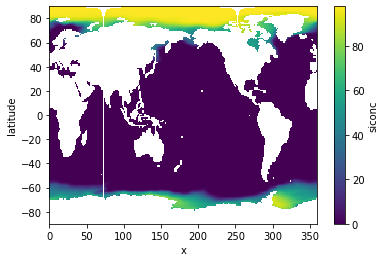

In [3]:
dd_regrid['CNRM-ESM2-1.gn.historical.SImon'].isel(time = slice(0,239)).mean('time', keep_attrs=True).siconc.plot()
# .sithick.isel(time = 1979).mean('time', keep_attrs=True).plot()

In [14]:
variables = ['siconc'] # sea ice thickness (m)
z_kwargs = {'consolidated': True, 'use_cftime': True}
query = dict(experiment_id=['historical'], 
             table_id=['SImon'],  
             variable_id=variables,
             grid_label=['gr'],
              source_id=['GFDL-ESM4', 'CESM2-WACCM', 'CESM2', 
                         'CESM2-FV2', 'MRI-ESM2-0', 
                         'GFDL-CM4', 'CESM2-WACCM-FV2']
            )


cat = col.search(**query)

# print(cat.df['source_id'].unique())
dd_gr = cat.to_dataset_dict(zarr_kwargs=z_kwargs, storage_options={'token': 'anon'},
                                preprocess=combined_preprocessing, aggregate=False)

dd_gr = merge_variables(dd_gr)

temp={}
for name,item in dd_gr.items():
    #print(name)
    #print(item.data_vars)
    present = item.data_vars
    if all(i in present for i in variables):
        #print(name)
        temp[name]=item
dd_gr = temp
# list(dd_new_gr.keys())

dd_gr = combine_datasets(
    dd_gr,
    pick_first_member,
    match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id']
)

for name, ds in dd_gr.items():
    ds = ds.siconc.isel(time = slice(0,239)).mean('time',keep_attrs=True)
    dd_gr[name] = ds

list(dd_gr.keys())
# dd_new_new_gr


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


['GFDL-CM4.gr.historical.SImon', 'GFDL-ESM4.gr.historical.SImon']

In [17]:
targetgrid_ds = xe.util.grid_global(1.0, 1.0)
targetgrid_ds['lon'] = targetgrid_ds['lon']+180
targetgrid_ds['lon_b'] = targetgrid_ds['lon_b']+180
newcoords = {'x':targetgrid_ds['lon'][0,:],'y':targetgrid_ds['lat'][:,0]}

dd_regrid_gr={}
for name,item in dd_gr.items():
    regridder = xe.Regridder(item, targetgrid_ds, 'bilinear', 
                         periodic=True, ignore_degenerate=True)
    ds_regridded = regridder(item).assign_coords(**newcoords)
#     .chunk({'time':120})
    dd_regrid_gr[name]=ds_regridded
list(dd_regrid_gr.keys())

/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/core.py:381: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/srv/conda/envs/notebook/lib/python3.8/site-packages/xesmf/frontend.py:439: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(
/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/core.py:381: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/srv/conda/envs/notebook/lib/python3.8/site-packages/xesmf/frontend.py:439: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


['GFDL-CM4.gr.historical.SImon', 'GFDL-ESM4.gr.historical.SImon']

In [18]:
dd = {**dd_regrid_gr, **dd_regrid}

/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.

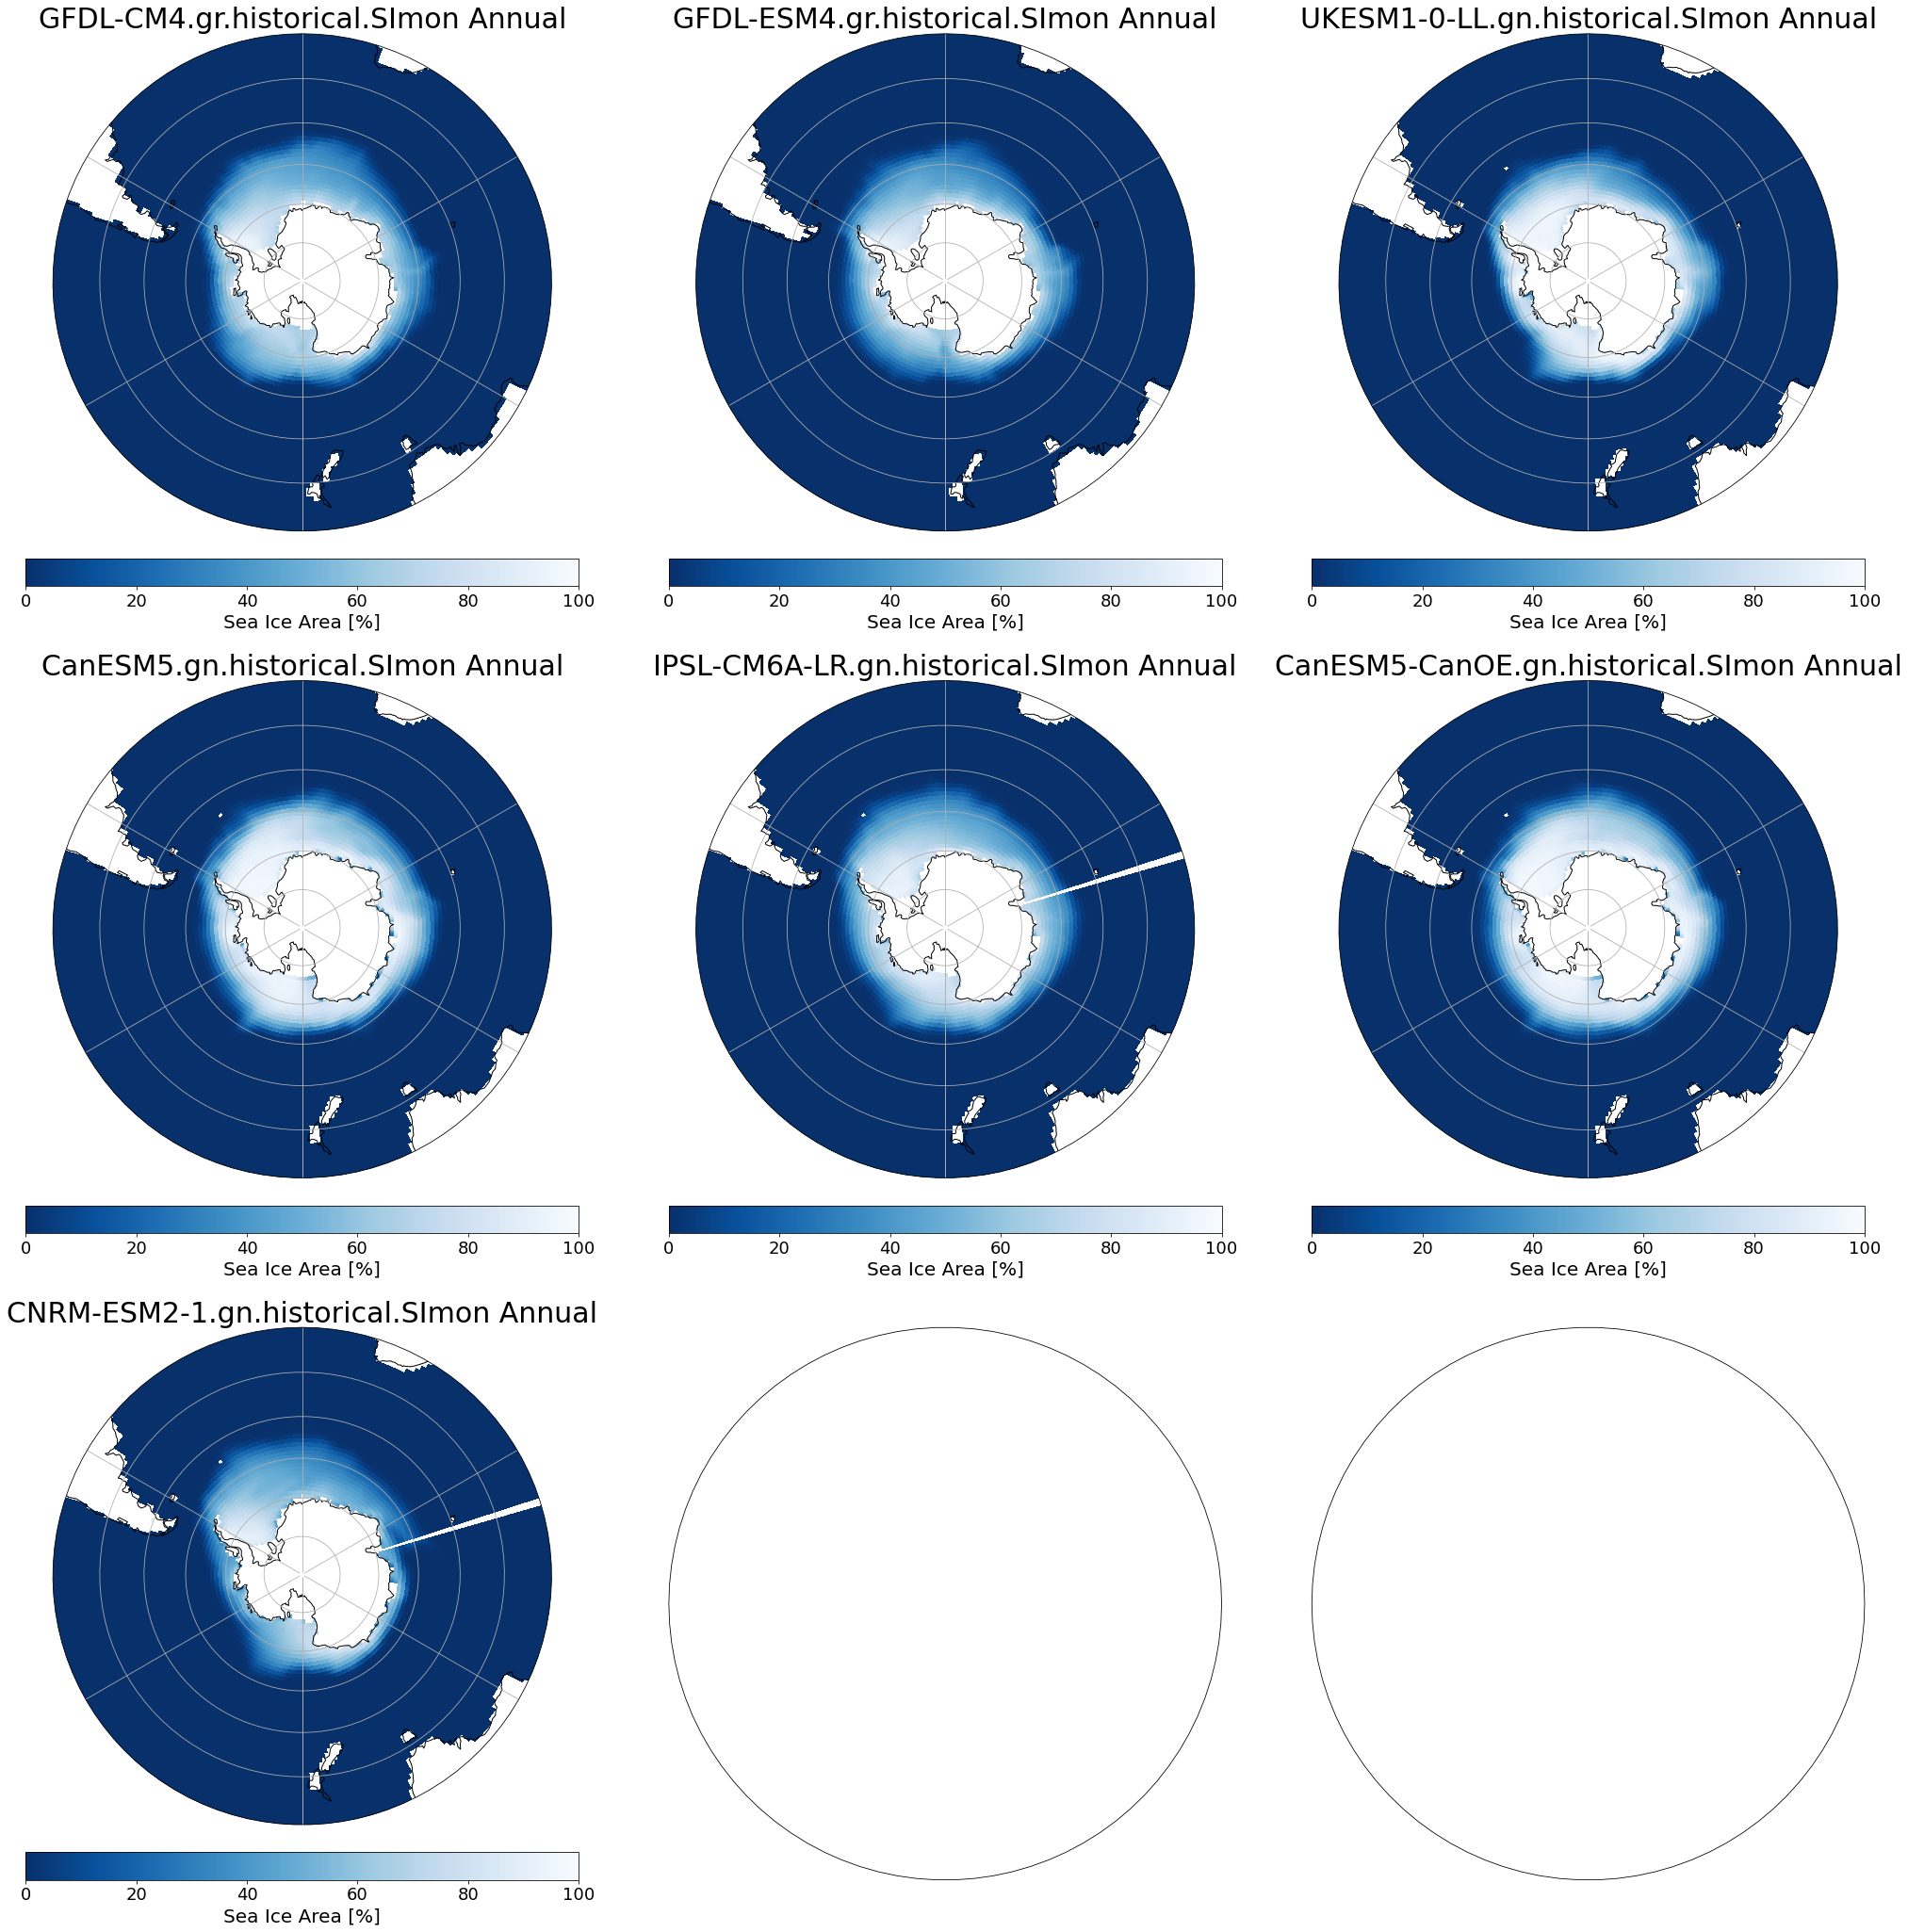

In [19]:
fig, axarr = plt.subplots(nrows = 3, ncols=3, figsize=[30,30], subplot_kw={'projection':ccrs.SouthPolarStereo()})
fig.tight_layout(pad = 10)
crs_plot = ccrs.SouthPolarStereo()
crs_source = ccrs.PlateCarree()

ax_idx = 0 # index for your axes array
for name, ds in dd.items():

    ax = axarr.flat[ax_idx]
    #fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':crs_plot})
#     ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
    ax.set_extent([-180, 180, -90, -30], crs_source)
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    
    ax.gridlines()
    ax.coastlines()
    
    title=name + ' Annual'
    ax.set_title(title,fontsize=30,pad = 1)
    
#     lat = ds.lat.transpose('y','x')
#     lon = ds.lon.transpose('y','x')
    X = ds.x
    Y = ds.y
    
#     conversion = 3.1536e7 * 83.3
    # 3.1536e7 seconds per year
    # 83.3 mol C per kg -- 12 gC/mol
    
    Z = ds
#     (time = slice(1740,1979)).mean('time', keep_attrs=True)
#     rho = ds['sigma2'].isel(lev = 0)
#     rho = rho.transpose('x','y')
#     rho.assign_coords({'lat': Y})
#     rho.assign_coords({'lon': X})
#     rho = rho.transpose('x','y')
#     rho.assign_coords({'lat': Y})
#     rho.assign_coords({'lon': X})
# #     rho = rho.transpose('y','x')
# #     print(Z)
# #     print(rho)
    
    
    im = ax.pcolormesh(X,Y,1*Z,cmap='Blues_r', transform = crs_source, shading = 'auto', vmin = 0, vmax = 100)
#     if name == 'UKESM1-0-LL.gn.historical.Omon' or name =='CanESM5-CanOE.gn.historical.Omon' or name =='CNRM-ESM2-1.gn.historical.Omon' or name == 'CanESM5.gn.historical.Omon' or name == 'IPSL-CM6A-LR.gn.historical.Omon':
#         CS = ax.contour(rho.lon,rho.lat,rho,transform=crs_source,levels=[35, 35.5, 36, 36.5, 36.8],colors='g', linewidths = 3)
#     else:
#         CS = ax.contour(rho.lon.transpose('y','x'),rho.lat.transpose('y','x'),rho.transpose('y','x'),transform=crs_source,levels=[35, 35.5, 36, 36.5],colors='g', linewidths = 3)
    
    cbar_label = 'Sea Ice Area [%]'
    cbar = plt.colorbar(im,ax = ax, orientation='horizontal',fraction = 0.05, pad=0.05)
    cbar.set_label(cbar_label, fontsize = 20)
    cbar.ax.tick_params(labelsize=18)
#     ax.clabel(CS, inline=1, fontsize=24)
    
    ax_idx += 1


/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.

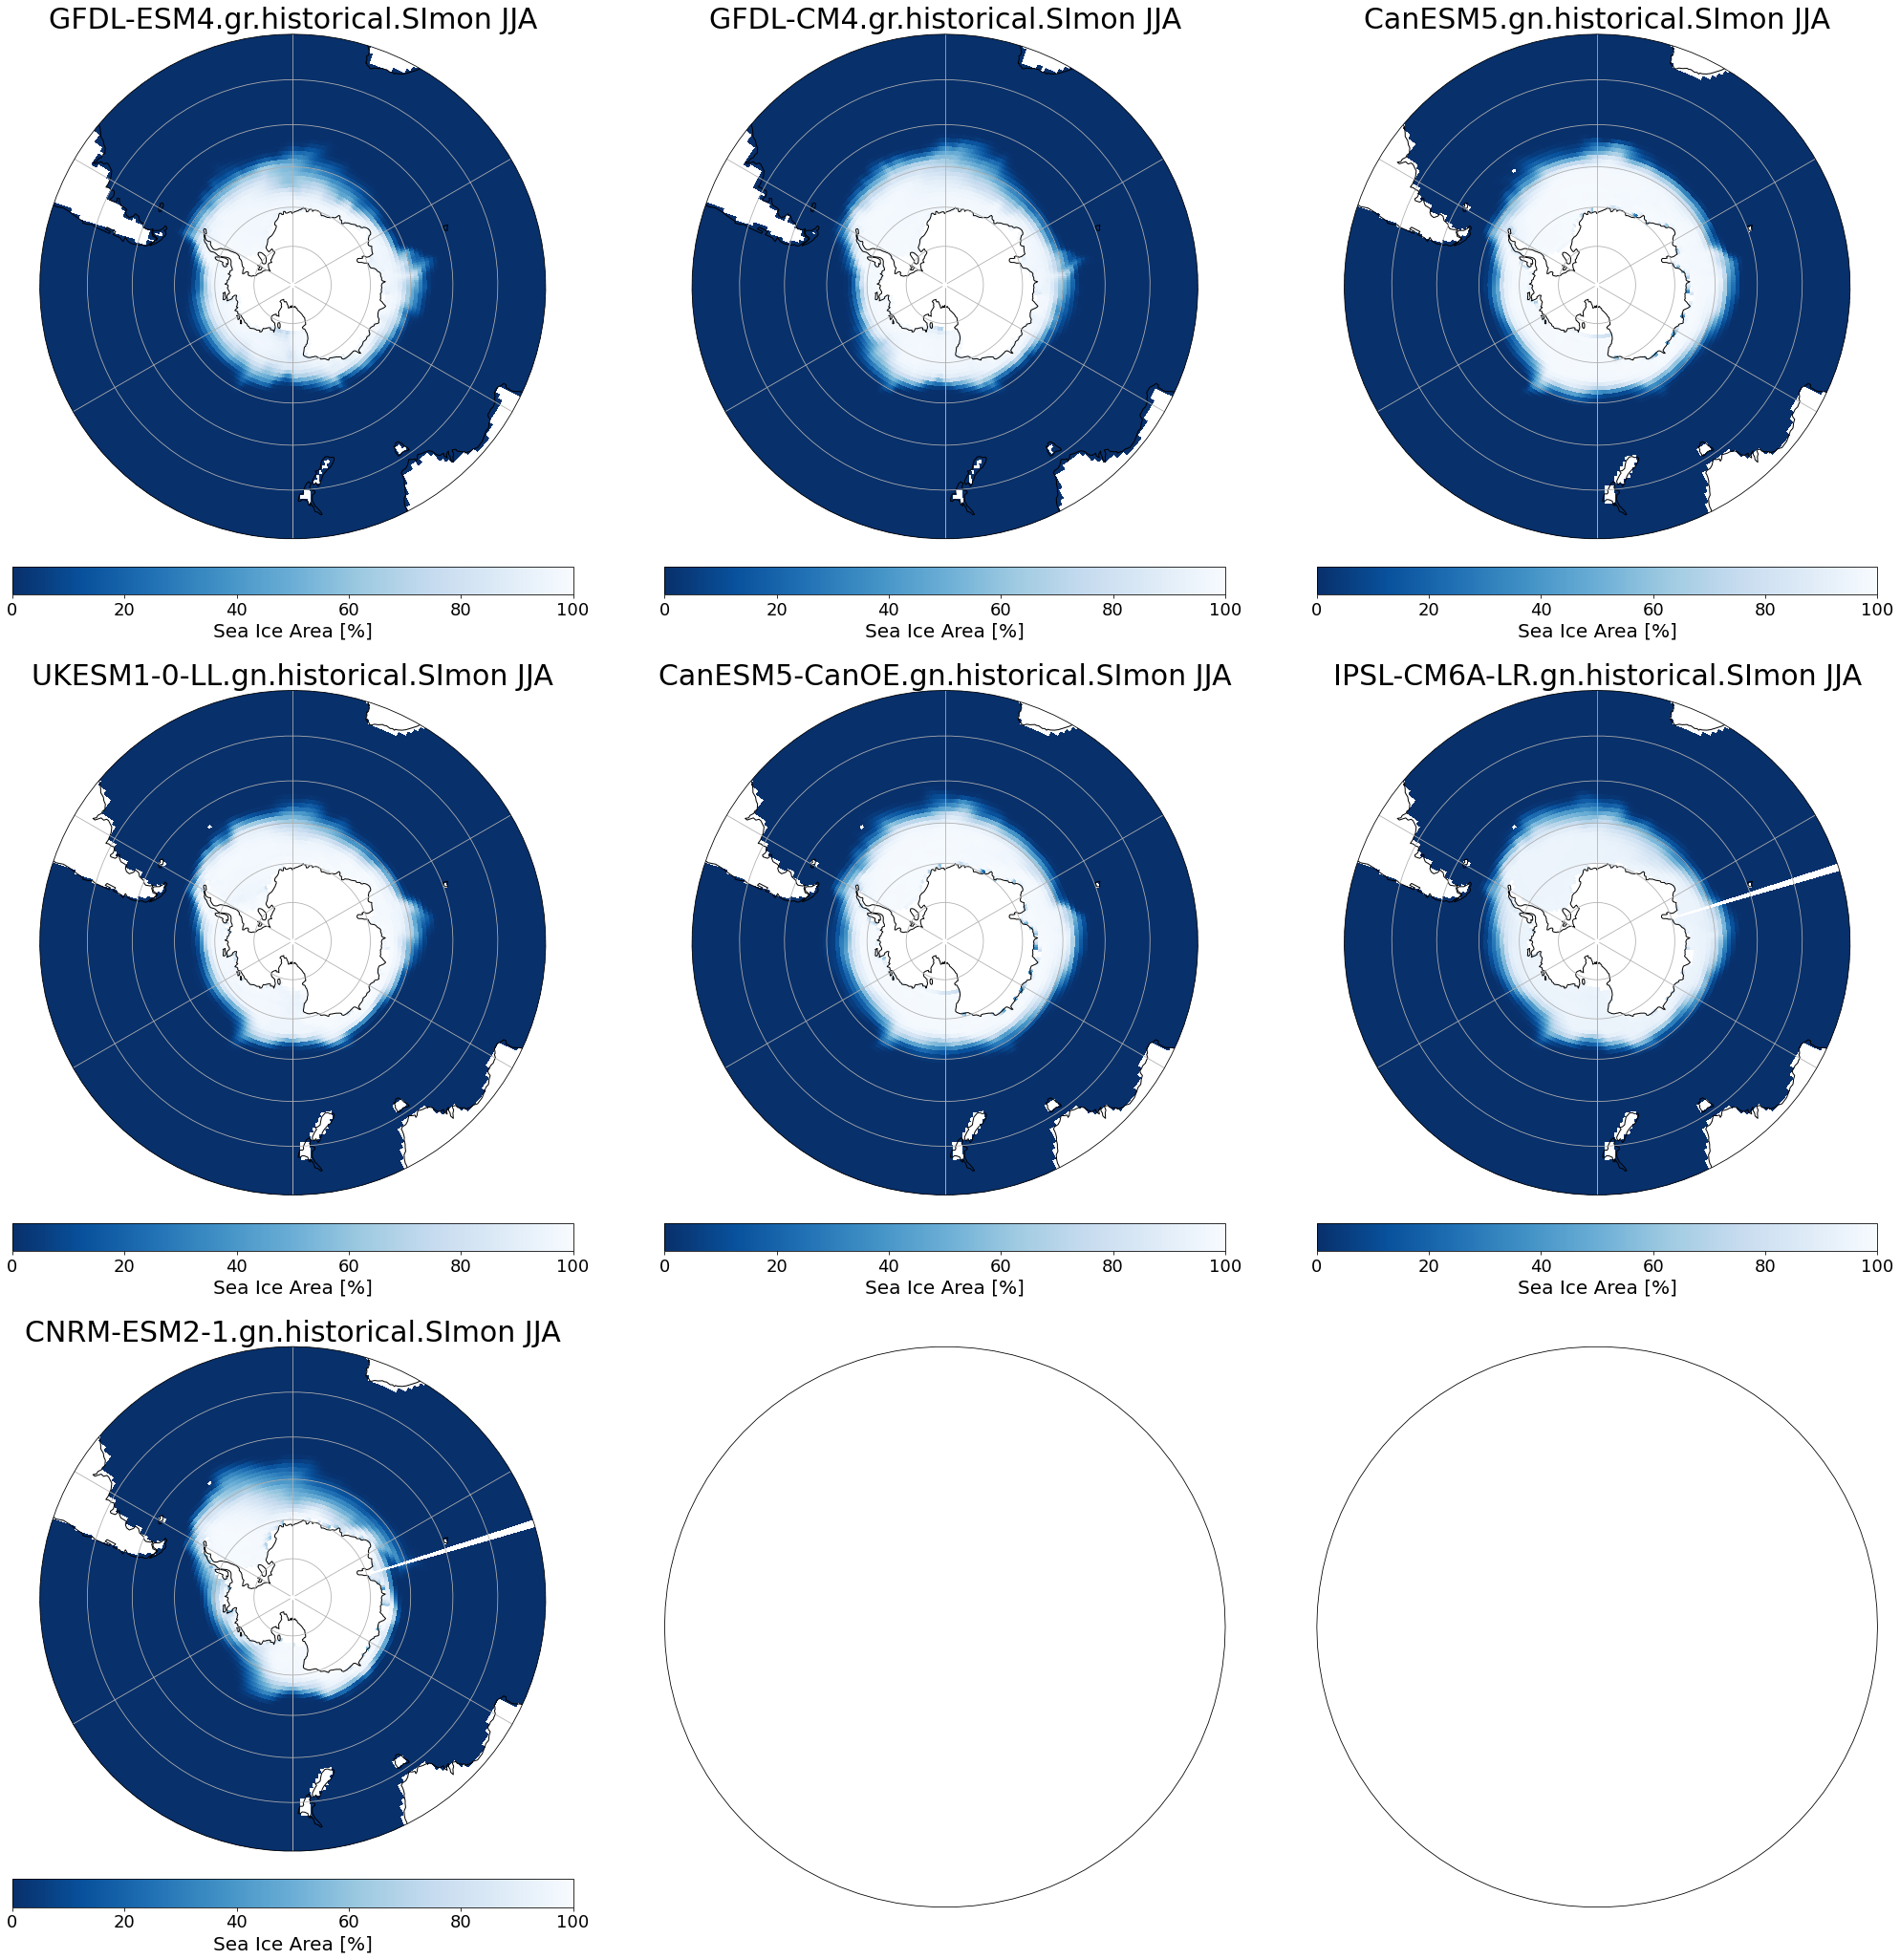

In [8]:
fig, axarr = plt.subplots(nrows = 3, ncols=3, figsize=[30,30], subplot_kw={'projection':ccrs.SouthPolarStereo()})
fig.tight_layout(pad = 10)
crs_plot = ccrs.SouthPolarStereo()
crs_source = ccrs.PlateCarree()

ax_idx = 0 # index for your axes array
for name, ds in dd.items():

    ax = axarr.flat[ax_idx]
    #fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':crs_plot})
#     ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
    ax.set_extent([-180, 180, -90, -30], crs_source)
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    
    ax.gridlines()
    ax.coastlines()
    
    title=name + ' JJA'
    ax.set_title(title,fontsize=30,pad = 1)
    
    lat = ds['siconc'].lat.transpose('y','x')
    lon = ds['siconc'].lon.transpose('y','x')
    X = lon
    Y = lat
    
#     conversion = 3.1536e7 * 83.3
    # 3.1536e7 seconds per year
    # 83.3 mol C per kg -- 12 gC/mol
    
    ds = ds['siconc'].isel(time = slice(0,239))
    Z = ds.sel(time=ds.time.dt.season=="JJA").mean('time',keep_attrs=True)
#     (time = slice(1740,1979)).mean('time', keep_attrs=True)
#     rho = ds['sigma2'].isel(lev = 0)
#     rho = rho.transpose('x','y')
#     rho.assign_coords({'lat': Y})
#     rho.assign_coords({'lon': X})
#     rho = rho.transpose('x','y')
#     rho.assign_coords({'lat': Y})
#     rho.assign_coords({'lon': X})
# #     rho = rho.transpose('y','x')
# #     print(Z)
# #     print(rho)
    
    
    im = ax.pcolormesh(X,Y,1*Z,cmap='Blues_r', transform = crs_source, shading = 'auto', vmin = 0, vmax = 100)
#     if name == 'UKESM1-0-LL.gn.historical.Omon' or name =='CanESM5-CanOE.gn.historical.Omon' or name =='CNRM-ESM2-1.gn.historical.Omon' or name == 'CanESM5.gn.historical.Omon' or name == 'IPSL-CM6A-LR.gn.historical.Omon':
#         CS = ax.contour(rho.lon,rho.lat,rho,transform=crs_source,levels=[35, 35.5, 36, 36.5, 36.8],colors='g', linewidths = 3)
#     else:
#         CS = ax.contour(rho.lon.transpose('y','x'),rho.lat.transpose('y','x'),rho.transpose('y','x'),transform=crs_source,levels=[35, 35.5, 36, 36.5],colors='g', linewidths = 3)
    
    cbar_label = 'Sea Ice Area [%]'
    cbar = plt.colorbar(im,ax = ax, orientation='horizontal',fraction = 0.05, pad=0.05)
    cbar.set_label(cbar_label, fontsize = 20)
    cbar.ax.tick_params(labelsize=18)
#     ax.clabel(CS, inline=1, fontsize=24)
    
    ax_idx += 1


In [9]:
col = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")

def pick_first_member(ds_list, **kwargs):
    return ds_list[0]

variables = ['areacello']
z_kwargs = {'consolidated': True, 'use_cftime': True}
query = dict(experiment_id=['historical'], 
             table_id=['Ofx'], 
             variable_id=variables,
             grid_label=['gr'],
              source_id=['GFDL-ESM4']
            )


cat = col.search(**query)

# print(cat.df['source_id'].unique())
dd_gr = cat.to_dataset_dict(zarr_kwargs=z_kwargs, storage_options={'token': 'anon'},
                                preprocess=combined_preprocessing, aggregate=False)

# dd_gr = merge_variables(dd_gr)

# temp={}
# for name,item in dd_gr.items():
#     #print(name)
#     #print(item.data_vars)
#     present = item.data_vars
#     if all(i in present for i in variables):
#         #print(name)
#         temp[name]=item
# dd_gr = temp
# list(dd_new_gr.keys())

dd_gr = combine_datasets(
    dd_gr,
    pick_first_member,
    match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id']
)
list(dd_gr.keys())
# dd_new_new_gr


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


['GFDL-ESM4.gr.historical.Ofx']

In [10]:
newcoords = {'x':dd_gr['GFDL-ESM4.gr.historical.Ofx'].areacello['x'], 'y':dd_gr['GFDL-ESM4.gr.historical.Ofx'].areacello['y']}

for name, ds in dd.items():
    dd[name] = ds.assign_coords(**newcoords)
    
# newercoords = {'y':dd_gr['GFDL-ESM4.gr.historical.Ofx'].areacello['y']}

# for name, ds in dd_x.items():
#     dd_x[name] = ds.assign_coords(**newercoords)


In [11]:
A = dd_gr['GFDL-ESM4.gr.historical.Ofx'].mean([ 'x'],keep_attrs=True).areacello
A

<xarray.DataArray 'areacello' (y: 180)>
dask.array<mean_agg-aggregate, shape=(180,), dtype=float32, chunksize=(180,), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Attributes:
    cell_methods:   area: sum
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Grid-Cell Area
    original_name:  areacello
    standard_name:  cell_area
    units:          m²

In [18]:
ds

<xarray.DataArray 'siconc' (y: 180, x: 360)>
dask.array<mean_agg-aggregate, shape=(180, 360), dtype=float64, chunksize=(180, 360), chunktype=numpy.ndarray>
Coordinates:
    lon      (y, x) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    lat      (y, x) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.

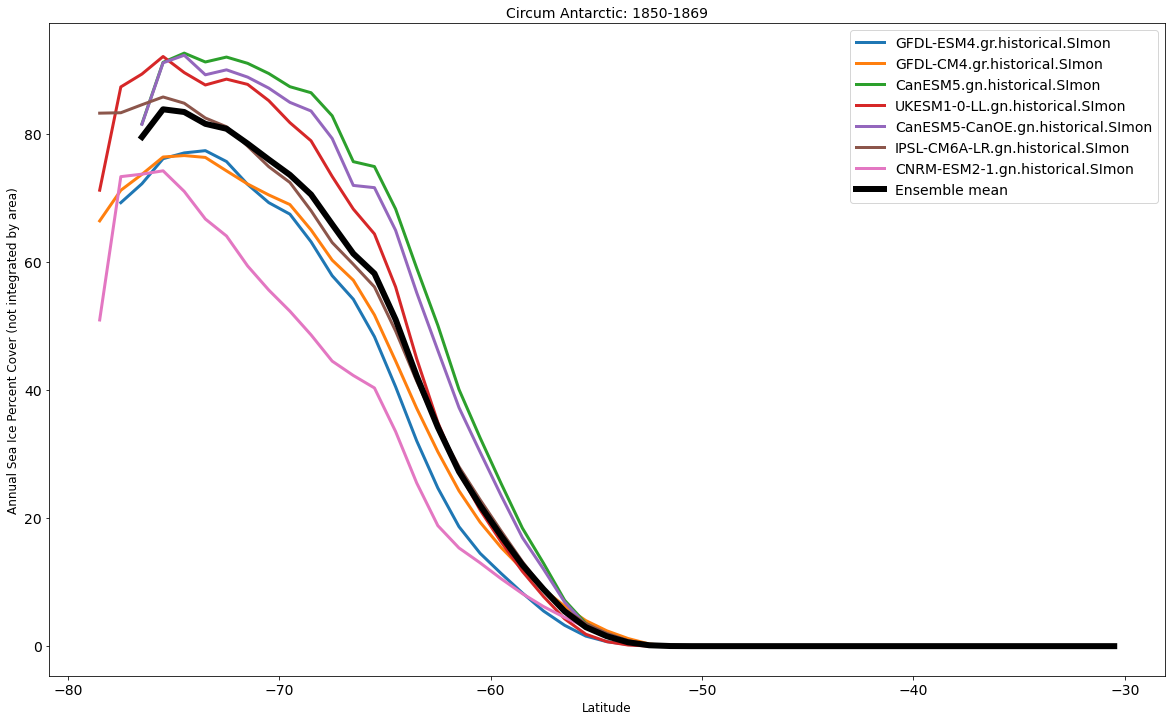

In [22]:
# d = dd['GFDL-CM4.gr.historical.Omon'].fgco2.mean(['x'],keep_attrs=True)
# d*A
temp = {}
plt.rc('font', size = 14)
plt.rc('axes', titlesize= 14)    
plt.rc('axes', labelsize= 12)
plt.rc('figure', titlesize=16)

for name, ds in dd.items():
    d = ds['siconc'].isel(time = slice(0,239)).mean('time',keep_attrs=True)
    d = d.mean(['x'],keep_attrs=True)
#     ar = d*A
    temp[name]=d
    

for name, ds in temp.items():
    plt.plot(ds.y[10:60], ds[10:60], label = name, lw = 3)
    plt.xlabel('Latitude')
    plt.ylabel('Annual Sea Ice Percent Cover (not integrated by area)')
    
mn = np.mean(list(temp.values()), axis=0)
plt.plot(ds.y[10:60], mn[10:60], lw = 6, label = 'Ensemble mean', color = 'black')
plt.xlabel('Latitude')
plt.ylabel('Annual Sea Ice Percent Cover (not integrated by area)')
# zr = xr.zeros_like(dd['CESM2-FV2.gr.historical.Omon'].fgco2)
# zr.isel(x = 0)[10:60].plot(linestyle = 'dashed', color = 'black')
# plt.xlabel('Latitude')
# plt.ylabel('Surface Upward Flux of Total CO\u2082 * Area (molC/yr)')

plt.legend(
#     bbox_to_anchor=(1.05, 1), 
    loc='upper right'
#     , borderaxespad=0.
)
plt.title('Circum Antarctic: 1850-1869')
plt.rcParams["figure.figsize"] = (20,12)

/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.

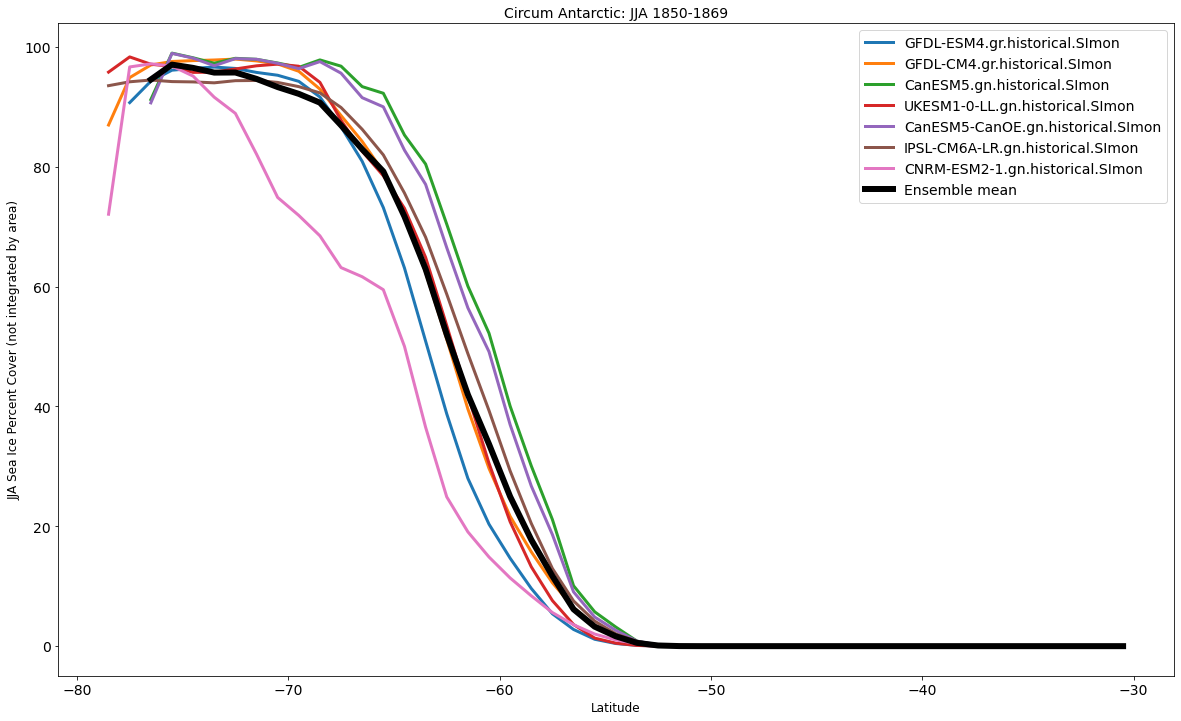

In [21]:
# d = dd['GFDL-CM4.gr.historical.Omon'].fgco2.mean(['x'],keep_attrs=True)
# d*A
temp = {}
plt.rc('font', size = 14)
plt.rc('axes', titlesize= 14)    
plt.rc('axes', labelsize= 12)
plt.rc('figure', titlesize=16)

for name, ds in dd.items():
    ds = ds['siconc'].isel(time = slice(0,239))
    ds = ds.sel(time=ds.time.dt.season=="JJA").mean('time',keep_attrs=True)
    d = ds.mean('x', keep_attrs = True)
#     ar = d*A
    temp[name]=d
    

for name, ds in temp.items():
    plt.plot(ds.y[10:60], ds[10:60], label = name, lw = 3)
    plt.xlabel('Latitude')
    plt.ylabel('Annual Sea Ice Percent Cover (not integrated by area)')
    
mn = np.mean(list(temp.values()), axis=0)
plt.plot(ds.y[10:60], mn[10:60], lw = 6, label = 'Ensemble mean', color = 'black')
plt.xlabel('Latitude')
plt.ylabel('JJA Sea Ice Percent Cover (not integrated by area)')
# zr = xr.zeros_like(dd['CESM2-FV2.gr.historical.Omon'].fgco2)
# zr.isel(x = 0)[10:60].plot(linestyle = 'dashed', color = 'black')
# plt.xlabel('Latitude')
# plt.ylabel('Surface Upward Flux of Total CO\u2082 * Area (molC/yr)')

plt.legend(
#     bbox_to_anchor=(1.05, 1), 
    loc='upper right'
#     , borderaxespad=0.
)
plt.title('Circum Antarctic: JJA 1850-1869')
plt.rcParams["figure.figsize"] = (20,12)

In [4]:
dd2 = {}
dd2['UKESM1-0-LL.gn.historical.Omon'] = xr.open_mfdataset('UKESM1_*_20yr.nc')
dd2['CanESM5-CanOE.gn.historical.Omon']= xr.open_mfdataset('CanESM5CanOE*_20yr.nc')
dd2['CNRM-ESM2-1.gn.historical.Omon']= xr.open_mfdataset('CNRM*_20yr.nc')
dd2['CanESM5.gn.historical.Omon']= xr.open_mfdataset('CanESM5_*_20yr.nc')
dd2['IPSL-CM6A-LR.gn.historical.Omon']= xr.open_mfdataset('IPSL*_20yr.nc')
dd2['CESM2-WACCM.gr.historical.Omon']= xr.open_mfdataset('CESM2-WACCM_*_20yr.nc')
dd2['CESM2.gr.historical.Omon']= xr.open_mfdataset('CESM2_*_20yr.nc')
dd2['CESM2-WACCM-FV2.gr.historical.Omon']= xr.open_mfdataset('CESM2-WACCM-FV2_*_20yr.nc')
dd2['GFDL-ESM4.gr.historical.Omon']= xr.open_mfdataset('GFDL-ESM4_*_20yr.nc')
dd2['CESM2-FV2.gr.historical.Omon']= xr.open_mfdataset('CESM2-FV2_*_20yr.nc')
dd2['GFDL-CM4.gr.historical.Omon']= xr.open_mfdataset('GFDL-CM4_*_20yr.nc')
dd2['MRI-ESM2-0.gr.historical.Omon']= xr.open_mfdataset('MRI-ESM2-0_*_20yr.nc')
# A = xr.open_mfdataset('AREA.nc')

/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: No contour leve

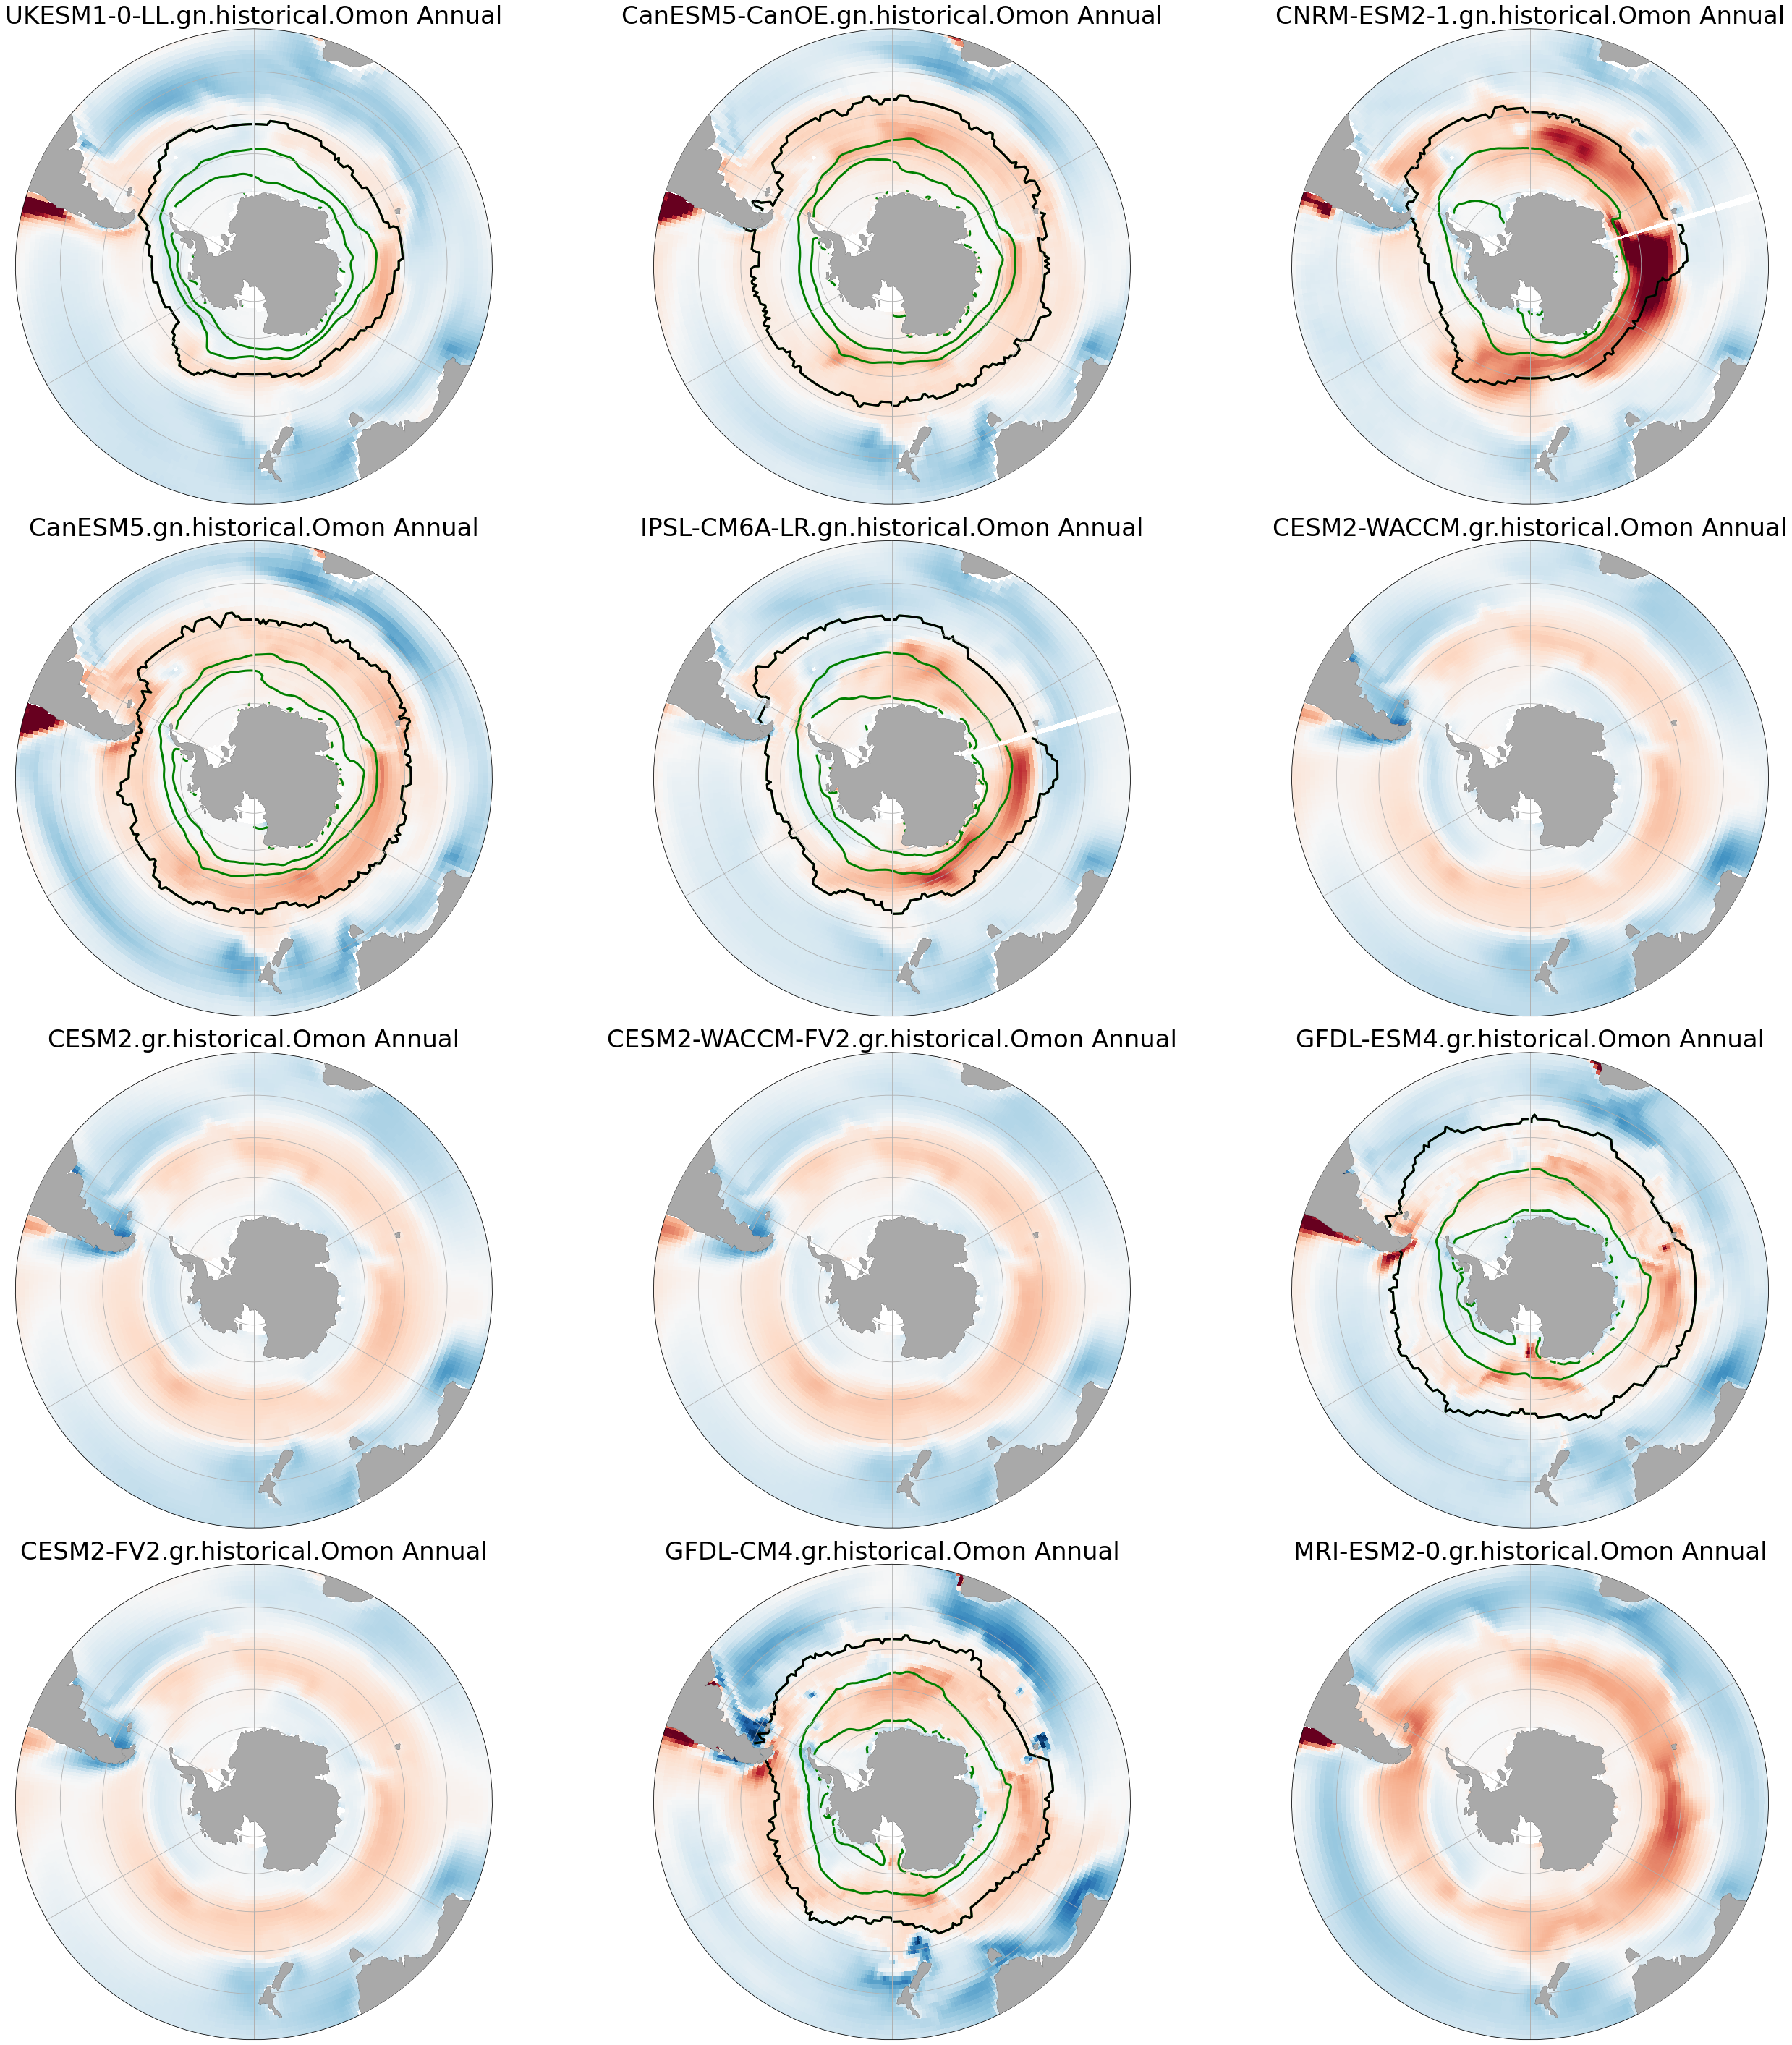

In [23]:
fig, axarr = plt.subplots(nrows = 4, ncols=3, figsize=[40,40], subplot_kw={'projection':ccrs.SouthPolarStereo()})
fig.tight_layout(pad = 5)
crs_plot = ccrs.SouthPolarStereo()
crs_source = ccrs.PlateCarree()

ax_idx = 0 # index for your axes array
for name, ds in dd2.items():

    ax = axarr.flat[ax_idx]
    #fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':crs_plot})
    ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
    ax.set_extent([-180, 180, -90, -30], crs_source)
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    
    ax.gridlines()
    ax.coastlines()
    
    title=name + ' Annual'
    ax.set_title(title,fontsize=34,pad = 1)
    
    lat = ds['fgco2'].lat.transpose('y','x')
    lon = ds['fgco2'].lon.transpose('y','x')
    X = lon
    Y = lat
    
    conversion = 3.1536e7 * 83.3
    # 3.1536e7 seconds per year
    # 83.3 mol C per kg -- 12 gC/mol
    
    Z = ds['fgco2']*conversion
    if name == 'UKESM1-0-LL.gn.historical.Omon':
        rho = dd['UKESM1-0-LL.gn.historical.SImon']
#         rho = rho.mean('time',keep_attrs=True)
#         rho = rho.transpose('x','y')
    elif name == 'GFDL-CM4.gr.historical.Omon':
        rho = dd['GFDL-CM4.gr.historical.SImon']
#         rho = rho.mean('time',keep_attrs=True)
#         rho = rho.transpose('x','y')
    elif name == 'GFDL-ESM4.gr.historical.Omon':
        rho = dd['GFDL-ESM4.gr.historical.SImon']
#         rho = rho.mean('time',keep_attrs=True)
#         rho = rho.transpose('x','y')
    elif name == 'CanESM5.gn.historical.Omon':
        rho = dd['CanESM5.gn.historical.SImon']
#         rho = rho.mean('time',keep_attrs=True)
#         rho = rho.transpose('x','y')
    elif name == 'CanESM5-CanOE.gn.historical.Omon':
        rho = dd['CanESM5-CanOE.gn.historical.SImon']
#         rho = rho.mean('time',keep_attrs=True)
#         rho = rho.transpose('x','y')
    elif name == 'IPSL-CM6A-LR.gn.historical.Omon':
        rho = dd['IPSL-CM6A-LR.gn.historical.SImon']
#         rho = rho.mean('time',keep_attrs=True)
#         rho = rho.transpose('x','y')
    elif name == 'CNRM-ESM2-1.gn.historical.Omon':
        rho = dd['CNRM-ESM2-1.gn.historical.SImon']
#         rho = rho.mean('time',keep_attrs=True)
#         rho = rho.transpose('x','y')
#     rho.assign_coords({'lat': Y})
#     rho.assign_coords({'lon': X})
#     rho = rho.transpose('x','y')
#     rho.assign_coords({'lat': Y})
#     rho.assign_coords({'lon': X})
# #     rho = rho.transpose('y','x')
# #     print(Z)
# #     print(rho)
    
    
    im = ax.pcolormesh(X,Y,-1*Z,cmap='RdBu_r', transform = crs_source, shading = 'auto', vmin = -5, vmax = 5)
    if name == 'UKESM1-0-LL.gn.historical.Omon' or name =='CanESM5-CanOE.gn.historical.Omon' or name =='CNRM-ESM2-1.gn.historical.Omon' or name == 'CanESM5.gn.historical.Omon' or name == 'IPSL-CM6A-LR.gn.historical.Omon' or name == 'GFDL-CM4.gr.historical.Omon' or name == 'GFDL-ESM4.gr.historical.Omon':
        CS = ax.contour(rho.x,rho.y,rho,transform=crs_source,levels=[0, 30, 70],colors='g', linewidths = 3)
        CS2 = ax.contour(rho.x,rho.y,rho,transform=crs_source,levels=[0],colors='black', linewidths = 3)
#     else:
#         CS = ax.contour(rho.lon.transpose('y','x'),rho.lat.transpose('y','x'),rho.transpose('y','x'),transform=crs_source,levels=[35, 35.5, 36, 36.5],colors='g', linewidths = 3)
    
#     cbar_label = 'Surface Upward Flux of Total CO\u2082 (mol/m\u00b2/yr)'
#     cbar = plt.colorbar(im,ax = ax, orientation='horizontal',fraction = 0.05, pad=0.05)
#     cbar.set_label(cbar_label, fontsize = 20)
#     cbar.ax.tick_params(labelsize=18)
#     ax.clabel(CS, inline=1, fontsize=24)
    ax_idx += 1


In [30]:
rho

<xarray.DataArray 'siconc' (x: 360, y: 180)>
dask.array<transpose, shape=(360, 180), dtype=float64, chunksize=(360, 180), chunktype=numpy.ndarray>
Coordinates:
    lon      (x, y) float64 dask.array<chunksize=(360, 180), meta=np.ndarray>
    lat      (x, y) float64 dask.array<chunksize=(360, 180), meta=np.ndarray>
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

In [3]:
col = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")

variables = ['sithick'] # sea ice thickness (m)
z_kwargs = {'consolidated': True, 'use_cftime': True}
query = dict(experiment_id=['historical'], 
             table_id=['SImon'],  
             variable_id=variables,
             grid_label=['gr'],
              source_id=['GFDL-ESM4', 'CESM2-WACCM', 'CESM2', 
                         'CESM2-FV2', 'MRI-ESM2-0', 
                         'GFDL-CM4', 'CESM2-WACCM-FV2']
            )


cat = col.search(**query)

# print(cat.df['source_id'].unique())
dd_gr = cat.to_dataset_dict(zarr_kwargs=z_kwargs, storage_options={'token': 'anon'},
                                preprocess=combined_preprocessing, aggregate=False)

dd_gr = merge_variables(dd_gr)

temp={}
for name,item in dd_gr.items():
    #print(name)
    #print(item.data_vars)
    present = item.data_vars
    if all(i in present for i in variables):
        #print(name)
        temp[name]=item
dd_gr = temp
# list(dd_new_gr.keys())

def pick_first_member(ds_list, **kwargs):
    return ds_list[0]

dd_gr = combine_datasets(
    dd_gr,
    pick_first_member,
    match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id']
)
list(dd_gr.keys())
# dd_new_new_gr


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


['GFDL-ESM4.gr.historical.SImon', 'GFDL-CM4.gr.historical.SImon']